I will be carrying out an explanatory analysis on Bank Customer data set. The aim of the analysis is not only to understand the data set better but also answer some of the questions below:

- What is the average balance in the bank?

- What is the relationship between balance and Gender?

- How customers are behaviouring in different country?

- What type customers are Existing the account?

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
data = pd.read_csv('Churn Modeling.csv')

In [11]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
data.shape

(10000, 14)

In [13]:
# missing values

In [14]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Balance

C:\Users\jaspr\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of the Customer Balance')

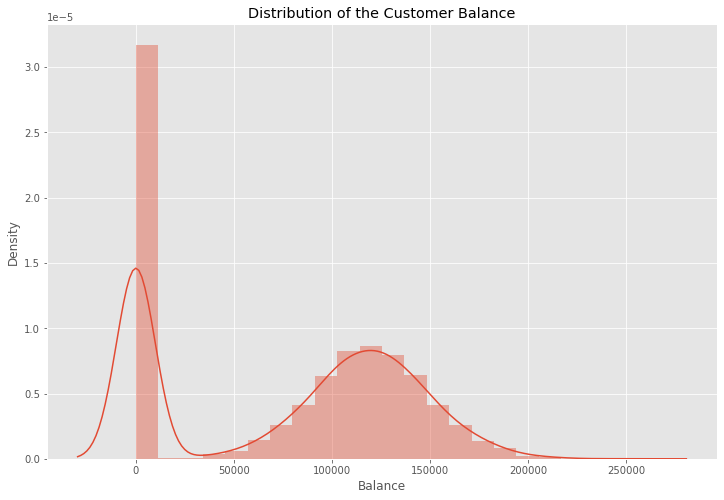

In [43]:
import matplotlib.style as style 
style.use('ggplot')

plt.figure(figsize=(12,8))
sns.distplot(data.Balance)
plt.title('Distribution of the Customer Balance')

C:\Users\jaspr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Balance'>

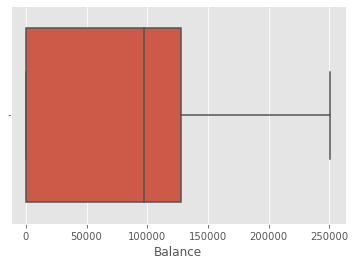

In [16]:
sns.boxplot(data.Balance)

In [17]:
data.Balance.describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

97k is the average balance in the bank.

In [18]:
(data[data.Balance==0].shape[0]/10000)*100

36.17

36% of the customers had zero bank balance. It would have been great to look their transaction history.

## Gender

In [19]:
data.groupby('Gender')['CustomerId'].count().div(data['CustomerId'].count()).mul(100)

Gender
Female    45.43
Male      54.57
Name: CustomerId, dtype: float64

The data split by gender is 45% Female and 55% Male.

In [20]:
data.groupby('Gender')['Balance'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
Female,4543.0,75659.369139,62102.467293,0.0,0.0,96147.55,127141.785,238387.56
Male,5457.0,77173.974506,62639.251138,0.0,0.0,98064.97,127900.030,250898.09


Text(0.5, 1.0, 'Amount of Balance in the Bank by Gender')

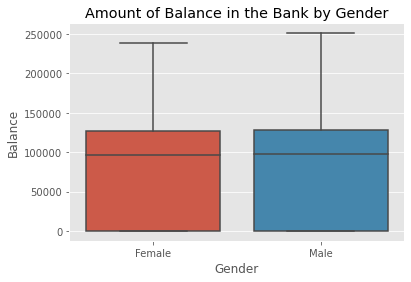

In [21]:
sns.boxplot(x="Gender", y="Balance", data=(data))
plt.title('Amount of Balance in the Bank by Gender')

Males tend to have more balance in the bank compare to Female. On Avearge Males had 98k deposited in the bank compare to female had 96k.
- With Max Balance been 25k

In [22]:
x= data[data.Balance==0]
x.groupby('Gender')['CustomerId'].count().div(data.groupby('Gender')['CustomerId'].count())

Gender
Female    0.364077
Male      0.359721
Name: CustomerId, dtype: float64

36% of the Females had zero bank balance, slightly edging males.

Text(0.5, 1.0, 'Estimated Salary by Gender')

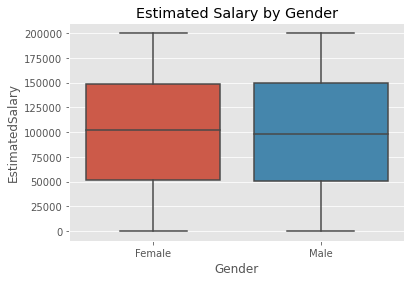

In [23]:
sns.boxplot(x="Gender", y="EstimatedSalary", data=(data))
plt.title('Estimated Salary by Gender')

## Data Correlation 

<AxesSubplot:>

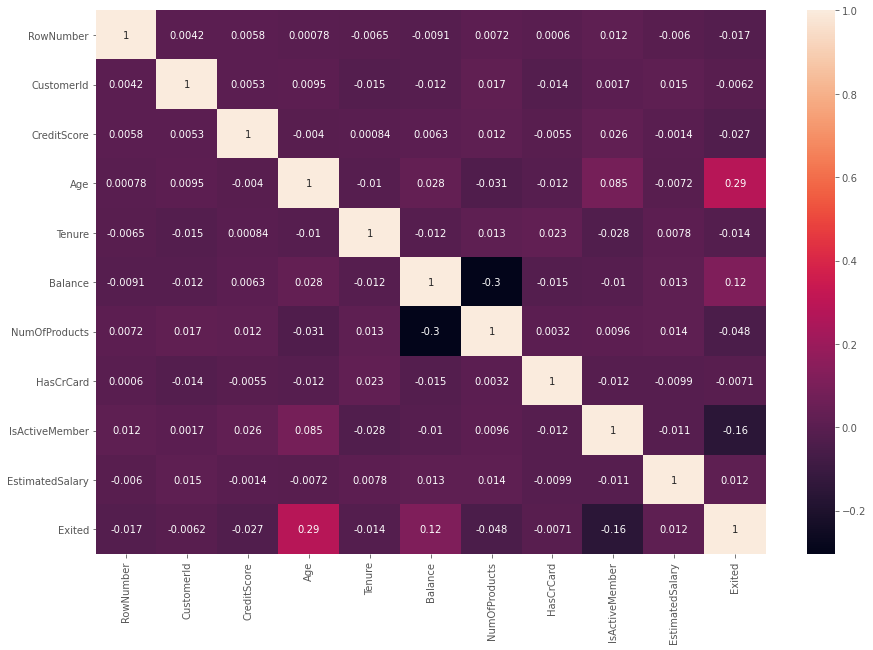

In [24]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True)

There are no correlation between Estimated salary and Amount of balance in the bank. 

However,there is a weak correlation between age and exited.  

## Geography

In [25]:
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 1.0, 'Amount of Balance in the Bank by Country')

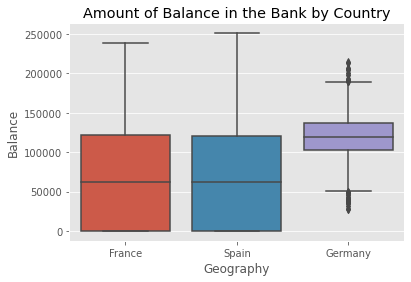

In [26]:
sns.boxplot(x="Geography", y="Balance", data=(data))
plt.title('Amount of Balance in the Bank by Country')

Text(0.5, 1.0, 'Estimated Salary by Country')

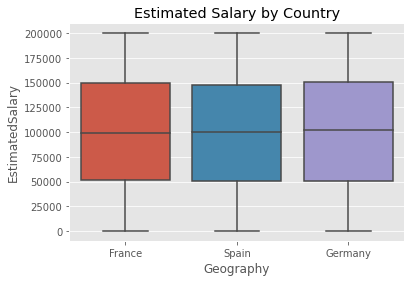

In [27]:
sns.boxplot(x="Geography", y="EstimatedSalary", data=(data))
plt.title('Estimated Salary by Country')

In [28]:
Ger = data[data['Geography']=='Germany']
Ger.Balance.describe()

count      2509.000000
mean     119730.116134
std       27022.006157
min       27288.430000
25%      102800.720000
50%      119703.100000
75%      137560.380000
max      214346.960000
Name: Balance, dtype: float64

In [29]:
spain = data[data['Geography']=='Spain']
spain.Balance.describe()

count      2477.000000
mean      61818.147763
std       64235.555208
min           0.000000
25%           0.000000
50%       61710.440000
75%      121056.630000
max      250898.090000
Name: Balance, dtype: float64

In [30]:
France = data[data['Geography']=='France']
France.Balance.describe()

count      5014.000000
mean      62092.636516
std       64133.565524
min           0.000000
25%           0.000000
50%       62153.500000
75%      121444.877500
max      238387.560000
Name: Balance, dtype: float64

There are twice as many French accounts compare to Spain and Germany. 
 - It is interesting to see mean balance for germany accounts is 119k vs (60k+ for Spain and France).
 - No Account belowing to Germany has Zero Balance in the bank.

## Churned Customers

In [31]:
data['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

The ratio of the churned accounts is 20:80. This is not a balanced data probably need to apply SMOTE when modeling the data.

Text(0.5, 1.0, 'Balance in the bank by Churn')

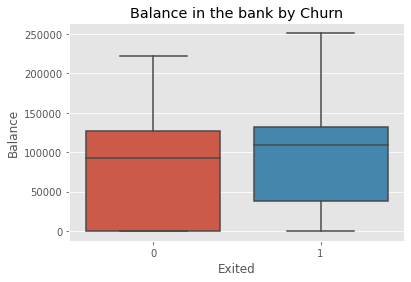

In [32]:
sns.boxplot(x="Exited", y="Balance", data=(data))
plt.title('Balance in the bank by Churn')

It looks like accounts are not closed because of less money in the account, in fact its quite the opposite. 

In [33]:
age = pd.pivot_table(data,index='Age',columns='Exited',values='CustomerId',aggfunc='count')

Text(0, 0.5, 'Bank Account')

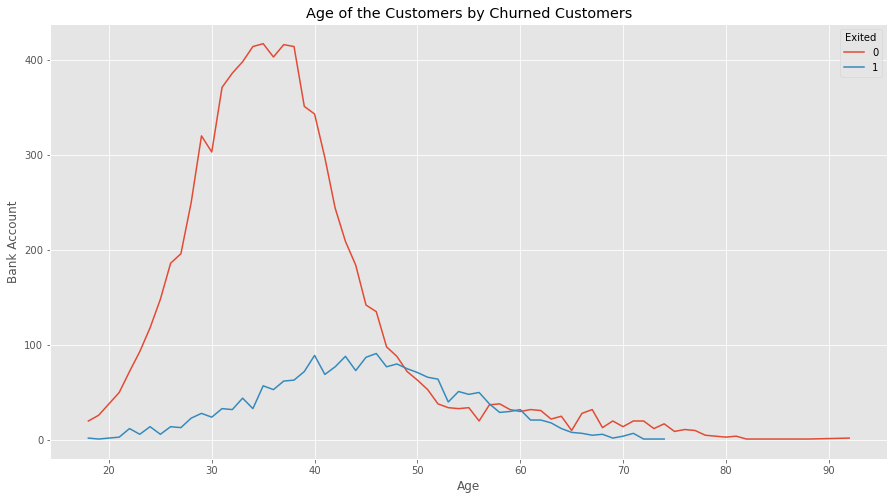

In [40]:
age.plot(figsize=(15,8),title= 'Age of the Customers by Churned Customers')
plt.ylabel('Bank Account')

Text(0.5, 1.0, 'Balance in the bank by Churn')

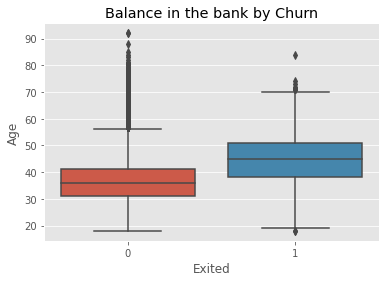

In [36]:
sns.boxplot(x="Exited", y="Age", data=(data))
plt.title('Balance in the bank by Churn')

The mean age of churned customer is 45 compare to non churned customer is 35.

Text(0.5, 1.0, 'Balance in the bank by Churn')

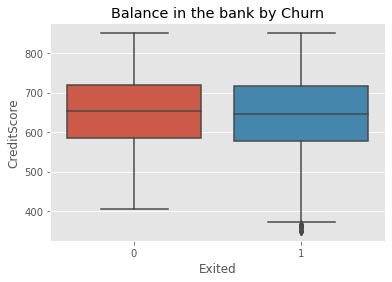

In [38]:
sns.boxplot(x="Exited", y="CreditScore", data=(data))
plt.title('Balance in the bank by Churn')

In [39]:
Ten = pd.pivot_table(data,index='Tenure',columns='Exited',values='CustomerId',aggfunc='count')

<AxesSubplot:xlabel='Tenure'>

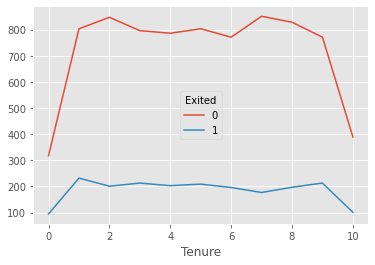

In [40]:
Ten.plot(kim)